# Spam Classification using Naive Bayes
<br>
<br>
<br>
<img src="https://d3i71xaburhd42.cloudfront.net/f2a08f398864282fbb5f536be04c65e409756792/5-Figure1-1.png" width="350"/>

# Downloading the dataset
## Execute once and change back to markdown
!wget https://spamassassin.apache.org/old/publiccorpus/20030228_easy_ham.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20030228_easy_ham_2.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20030228_spam.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20050311_spam_2.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20030228_hard_ham.tar.bz2

# Extracting the dataset
## Execute once and change back to markdown
!tar xvjf 20030228_easy_ham_2.tar.bz2
!tar xvjf 20030228_easy_ham.tar.bz2
!tar xvjf 20030228_hard_ham.tar.bz2    
!tar xvjf 20030228_spam.tar.bz2
!tar xvjf 20050311_spam_2.tar.bz2

In [2]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/anmol/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/anmol/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import email

path = '/media/anmol/Study/GITHUB/Workshop_NIT_Meghalaya/Tutorial/PART_7-PROJECT/data/'

In [4]:
path_easy_ham = glob.glob(path+'easy_ham/*')
path_easy_ham2 = glob.glob(path+'easy_ham_2/*')
path_hard_ham = glob.glob(path+'hard_ham/*')
spam1 = glob.glob(path+'spam/*')
spam2 = glob.glob(path+'spam_2/*')

# Split the data into test and train

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
ham_path = [path_easy_ham, path_easy_ham2, path_hard_ham]

In [7]:
XHam = np.array([train_test_split(i) for i in ham_path])
XHam.shape

(3, 2)

In [8]:
XHam_train = np.array([])
XHam_test = np.array([])
for i in XHam:
    XHam_train = np.concatenate((XHam_train,i[0]),axis = 0)
    XHam_test = np.concatenate((XHam_test,i[1]),axis = 0)
XHam_train

array(['/media/anmol/Study/GITHUB/Workshop_NIT_Meghalaya/Tutorial/PART_7-PROJECT/data/easy_ham/00617.5433c6be9644f6d773afef39392cb24c',
       '/media/anmol/Study/GITHUB/Workshop_NIT_Meghalaya/Tutorial/PART_7-PROJECT/data/easy_ham/01317.55468871d6f7618afed9a0b07ee2609e',
       '/media/anmol/Study/GITHUB/Workshop_NIT_Meghalaya/Tutorial/PART_7-PROJECT/data/easy_ham/01844.291384ad2b36270505f0923d501a0c1a',
       ...,
       '/media/anmol/Study/GITHUB/Workshop_NIT_Meghalaya/Tutorial/PART_7-PROJECT/data/hard_ham/00091.7c3181e801c15b857b81100fba6f0519',
       '/media/anmol/Study/GITHUB/Workshop_NIT_Meghalaya/Tutorial/PART_7-PROJECT/data/hard_ham/00112.3851987ee7827b01ddb89bb99999adc4',
       '/media/anmol/Study/GITHUB/Workshop_NIT_Meghalaya/Tutorial/PART_7-PROJECT/data/hard_ham/00196.a1dbbf4dd324bb585342320e1ca42e2f'],
      dtype='<U127')

In [9]:
XHam_train.shape, XHam_test.shape

((3113,), (1040,))

In [10]:
 XSpam = np.array([train_test_split(i) for i in [spam1, spam2]])

In [11]:
XSpam.shape

(2, 2)

In [12]:
for i in XSpam:
    print(i)

OJECT/data/spam_2/00988.464959d4fcdd919a51e6220a909eb41c', '/media/anmol/Study/GITHUB/Workshop_NIT_Meghalaya/Tutorial/PART_7-PROJECT/data/spam_2/01294.1b87da1a627d8b8f126839dad1220a1c', '/media/anmol/Study/GITHUB/Workshop_NIT_Meghalaya/Tutorial/PART_7-PROJECT/data/spam_2/00262.12fb50ad3782b7b356672a246f4902a6', '/media/anmol/Study/GITHUB/Workshop_NIT_Meghalaya/Tutorial/PART_7-PROJECT/data/spam_2/00317.902b19a36e88cd3ad096e736ff8c81a5', '/media/anmol/Study/GITHUB/Workshop_NIT_Meghalaya/Tutorial/PART_7-PROJECT/data/spam_2/01150.c429b55e3a5834c74d18f9b0bfc968cd', '/media/anmol/Study/GITHUB/Workshop_NIT_Meghalaya/Tutorial/PART_7-PROJECT/data/spam_2/00428.5fe2c974b49315a6fbf9f3b09b47f030', '/media/anmol/Study/GITHUB/Workshop_NIT_Meghalaya/Tutorial/PART_7-PROJECT/data/spam_2/01280.34dde162b3c6b2e873fc9f094d28b0fd', '/media/anmol/Study/GITHUB/Workshop_NIT_Meghalaya/Tutorial/PART_7-PROJECT/data/spam_2/00032.3b93a3c65e0a2454fc9646ce01363938', '/media/anmol/Study/GITHUB/Workshop_NIT_Meghalaya/Tu

In [13]:
XSpam_train = np.array([])
XSpam_test = np.array([])
for i in XSpam:
    XSpam_train = np.concatenate((XSpam_train,i[0]),axis=0)
    XSpam_test = np.concatenate((XSpam_test,i[1]),axis=0)
XSpam_train.shape

(1422,)

In [14]:
XSpam_test.shape

(476,)

In [15]:
XHam_train.shape, XSpam_train.shape

((3113,), (1422,))

# Generating Training Data

In [16]:
hamTrainLabel = [0]*XHam_train.shape[0]
spamTrainLabel = [1]*XSpam_train.shape[0]
XTrain = np.concatenate((XHam_train, XSpam_train))
YTrain = np.concatenate((hamTrainLabel, spamTrainLabel))

In [17]:
XTrain.shape, YTrain.shape

((4535,), (4535,))

# Generating Testing Data

In [19]:
hamTestLabel = [0]*XHam_test.shape[0]
spamTestLabel = [1]*XSpam_test.shape[0]
XTest = np.concatenate((XHam_test, XSpam_test))
YTest = np.concatenate((hamTestLabel, spamTestLabel))

In [21]:
XTest.shape, YTest.shape

((1516,), (1516,))

# Shuffling/Randomizing features

In [22]:
trainShuffle =np.random.permutation(np.arange(0,XTrain.shape[0]))
testShuffle = np.random.permutation(np.arange(0, XTest.shape[0]))

In [23]:
trainShuffle

array([3353, 2344, 4363, ..., 1098, 4156,  407])

In [24]:
XTest.shape, YTest.shape,XTrain.shape, YTrain.shape

((1516,), (1516,), (4535,), (4535,))

In [25]:
XTrain = XTrain[trainShuffle]
XTest = XTest[testShuffle]
YTrain = YTrain[trainShuffle]
YTest = YTest[testShuffle]

In [26]:
XTrain.shape, YTrain.shape, XTest.shape, YTest.shape

((4535,), (4535,), (1516,), (1516,))

# Get Emails From the Directories

In [27]:
def getContent(contentPath):
    
    fp = open(contentPath, encoding = 'latin1')
    try:
        m = email.message_from_file(fp)
        for i in m.walk():
            if i.get_content_type() == 'text/plain':
                return i.get_payload()
    except Exception as e:
        print("EXCEPTION:", e)

def getBulk(contentPath):
    cont = [getContent(i) for i in contentPath]
    return cont



In [28]:
XTrain.shape, YTrain.shape, XTest.shape, YTest.shape

((4535,), (4535,), (1516,), (1516,))

In [29]:
XTrain = getBulk(XTrain)

In [30]:
XTest = getBulk(XTest)

In [31]:
len(YTrain), len(XTrain),len(XTest)

(4535, 4535, 1516)

# Removing empty emails

In [32]:
def rem_null(datas,labels):
    notNull = [i for i,j in enumerate(datas) if j is not None]
    return np.array(datas)[notNull], np.array(labels)[notNull]

In [33]:
XTrain, YTrain = rem_null(XTrain, YTrain)
XTest, YTest = rem_null(XTest, YTest)

In [34]:
len(XTrain) ,len(YTrain),len(XTest), len(YTest)

(3812, 3812, 1264, 1264)

# Preprocessing

In [35]:
import re
import string
from nltk.tokenize import word_tokenize

## Process Sentence

In [36]:
def removeHTTP(w):
    return re.sub(r"http\S+","",w)
def lower(w):
    res = w.lower()
    return res
def removeNum(w):
    res =  re.sub(r'\d+','',w)
    return res
def removePunc(w):
    res = w.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return res
def removeWhite(w):
    res = w.strip()
    return res
def removeNewline(w):
    return w.replace('\n','')
def preprocess(s):
    pre = [removeHTTP, removeNewline, lower, removeNum, removePunc, removeWhite]
    for i in pre:
        s = i(s)
    return s


In [37]:
XTrain = [preprocess(i) for i in XTrain]
XTest = [preprocess(i) for i in XTest]

In [38]:
len(XTrain) ,len(YTrain),len(XTest), len(YTest)

(3812, 3812, 1264, 1264)

In [39]:
XTrain[1]

'once upon a time matthias wrote  on thu  jul    matthias saou matthiasegwnnet wrote   once upon a time matthias wrote    see subject  see valhallafreshrpmsnet   hi matthias  you should temporarly remove gentoo  from valhallafreshrpmsnet this build and  has a strong bug problems with copying deep directories  have reported this to emil he looks currently into it a fix should be available soon  sorrydonewell i feel especially sorry for him since he already qualified  ofbrown paper bag release because of the column header clicking bug ill put up the next version as soon as its out hoping itll fix allcurrent issuesmatthias matthias saou                                world trade center                                edificio norte  plantasystem and network engineer                   barcelona spainelectronic group interactive                 phone      rpmlist mailing list rpmlistfreshrpmsnet'

## Process word by word

In [40]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [41]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [42]:
XTrain = [word_tokenize(i) for i in XTrain]
XTest = [word_tokenize(i) for i in XTest]

In [43]:
len(XTrain) ,len(YTrain),len(XTest), len(YTest)

(3812, 3812, 1264, 1264)

# Some text processing basics
## Stop words
A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.<br><br><br>
<img src="https://onlinemediamasters.com/wp-content/uploads/2015/11/Stop-Words.jpg" width="500"/>
## Stemming and Lemmatization
- Stemming and Lemmatization both generate the root form of the inflected words. The difference is that stem might not be an actual word whereas, lemma is an actual language word.
- Stemming is the process of removing the last few characters of a given word, to obtain a shorter form, even if that form doesn't have any meaning. It can be done very quickly.<br><br><br>
<img src="https://i.stack.imgur.com/q2zMp.png" width="200"/><br><br><br>
- Lemmatization on the other hand, is the process of converting the given word into it's base form according to the dictionary meaning of the word. It takes more time than stemming.<br><br><br>
<img src="https://i.stack.imgur.com/0ESAC.png" width="400"/>

In [44]:
def removeStopWords(w):
    return [i for i in w if i not in ENGLISH_STOP_WORDS]
def wordStemmer(w):
    return [stemmer.stem(i) for i in w]
def wordLemmatizer(w):
    return [lemmatizer.lemmatize(i) for i in w]
def processToken(w):
    proToken = [removeStopWords, wordLemmatizer]
    for i in proToken:
        w = i(w)
    return w

In [45]:
XTrain = [processToken(i) for i in XTrain]
XTest = [processToken(i) for i in XTest]

In [46]:
len(XTrain) ,len(YTrain),len(XTest), len(YTest)

(3812, 3812, 1264, 1264)

In [47]:
XTrain = [" ".join(i) for i in XTrain]
XTest = [" ".join(i) for i in XTest]

In [48]:
len(XTrain) ,len(YTrain),len(XTest), len(YTest)

(3812, 3812, 1264, 1264)

# Visualization

## Wordcloud

In [49]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [50]:
def cloudPlot(text, mask = None, title=None, imgColor = False):
    stopwords = set(STOPWORDS)
    temp = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(temp)
    
    wordcloud = WordCloud(background_color='white',stopwords = stopwords, max_words = 200, max_font_size = 100, random_state = 42, width = 800, height = 400, mask = mask)

    wordcloud.generate(str(text))

    plt.figure(figsize = (10,9))
    if imgColor:
        imgColor = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func = image_colors), interpolation = "bilinear")
        plt.title(title, fontdict = {'size': 40, 'verticalalignment':'bottom'})
    else:
        plt.imshow(wordcloud)
        plt.title(title, fontdict = {'size':40, 'color':'black', 'verticalalignment':'bottom'})
    plt.axis('off')
    plt.tight_layout()

In [51]:
XTrain[1]

'time matthias wrote thu jul matthias saou matthiasegwnnet wrote time matthias wrote subject valhallafreshrpmsnet hi matthias temporarly remove gentoo valhallafreshrpmsnet build strong bug problem copying deep directory reported emil look currently fix available soon sorrydonewell feel especially sorry qualified ofbrown paper bag release column header clicking bug ill version soon hoping itll fix allcurrent issuesmatthias matthias saou world trade center edificio norte plantasystem network engineer barcelona spainelectronic group interactive phone rpmlist mailing list rpmlistfreshrpmsnet'

In [65]:
Email = np.array(XTrain)[YTrain]

In [ ]:
cloudPlot(Email, title = 'Email')

In [334]:
"""spamYTrainIdx = [i for i,j in enumerate(YTrain) if j==1]
hamYTrainIdx = [i for i,j in enumerate(YTrain) if j==0]"""

spamTrainIdx = [i for i,j in enumerate(YTrain) if j==1]
hamTrainIdx = [i for i,j in enumerate(YTrain) if j==0]

In [335]:
len(XTrain),len(spamTrainIdx)

(3476, 452)

In [336]:
len(XTrain),len(YTrain)

(3476, 3476)

In [337]:
spamEmail = np.array(XTrain)[spamTrainIdx]
hamEmail = np.array(XTrain)[hamTrainIdx]

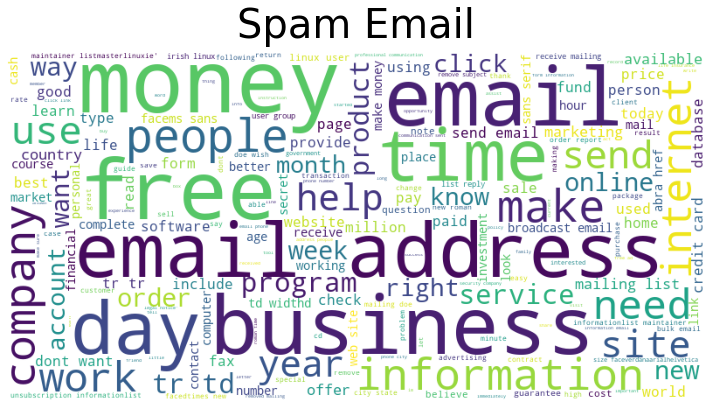

In [338]:
cloudPlot(spamEmail, title = 'Spam Email')

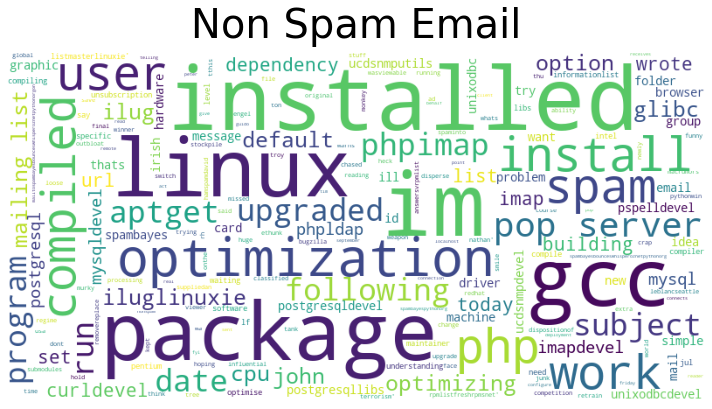

In [339]:
cloudPlot(hamEmail, title = "Non Spam Email")

# Feature Extraction
Feature Extraction is a dimensionality reduction technique used to represent data effictively in different groups for better processing.

## TfidVectorizer

TF-IDF Vectorizer creates Tf-IDF values for every word in our text messages. Tf-IDF values are computed in a manner that gives a higher value to words appearing less frequently so that words appearing many times due to English syntax don’t overshadow the less frequent yet more meaningful and interesting terms.

In [340]:
XTrain = [i.split(" ") for i in XTrain]
XTest = [i.split(" ") for i in XTest]

In [341]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [342]:
vect = TfidfVectorizer()
raw = [' '.join(i) for i in XTrain]
vect.fit(raw)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [343]:
def conFeatures(s):
    temp = [' '.join(i) for i in s]
    return vect.transform(temp)

In [344]:
XTrainFeatures = conFeatures(XTrain)
XTestFeatures = conFeatures(XTest)

In [345]:
XTrainFeatures

<3476x78432 sparse matrix of type '<class 'numpy.float64'>'
	with 312338 stored elements in Compressed Sparse Row format>

## Count Vectorizer
Count Vectorizer is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [346]:
from sklearn.feature_extraction.text import CountVectorizer

In [347]:
Cvect = CountVectorizer()
raw = [' '.join(i) for i in XTrain]
Cvect.fit(raw)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [348]:
XTrainFeatures = conFeatures(XTrain)
XTestFeatures = conFeatures(XTest)

In [349]:
XTrainFeatures

<3476x78432 sparse matrix of type '<class 'numpy.float64'>'
	with 312338 stored elements in Compressed Sparse Row format>

# Training Classifier

In [350]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [351]:
teacher = GaussianNB()

In [352]:
learner = teacher.fit(XTrainFeatures.toarray(),YTrain)

In [353]:
teacher.score(XTrainFeatures.toarray(),YTrain)

0.9968354430379747

In [354]:
teacher.score(XTrainFeatures.toarray(),YTrain)

0.9968354430379747

# Error Analysis

In [355]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

In [356]:
YPred = teacher.predict(XTestFeatures.toarray())

In [357]:
YPred

array([0, 0, 0, ..., 1, 0, 0])

In [358]:
confusion_matrix(YTest, YPred)

array([[983,  24],
       [ 42, 118]])

In [359]:
tn, fp, fn, tp = confusion_matrix(YTest,YPred).ravel()

# Precision and Recall
- While precision refers to the percentage of your results which are relevant, recall refers to the percentage of total relevant results correctly classified by your algorithm.
- Precision attempts to answer, "What proportion of positive identifications was actually correct?".
- Recall attempts to answer, "What proportion of actual positives was identified correctly?".


In [360]:
print("Precision: {:.2f}%".format(100 * precision_score(YTest, YPred)))
print("Recall: {:.2f}%".format(100 * recall_score(YTest, YPred)))

Precision: 83.10%
Recall: 73.75%


In [361]:
from sklearn.metrics import confusion_matrix
import itertools

In [362]:
cnMatrix = confusion_matrix(YTest, YPred)

## Plot Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

In [363]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[983  24]
 [ 42 118]]


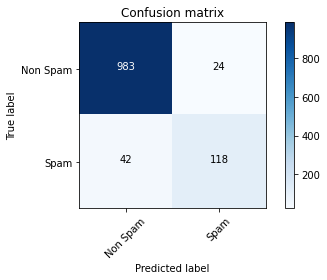

In [366]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnMatrix, classes=['Non Spam','Spam'],title='Confusion matrix')